In [13]:
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("source_data/birds.csv", sep="\t")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977813 entries, 0 to 977812
Data columns (total 50 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   gbifID                            977813 non-null  int64  
 1   datasetKey                        977813 non-null  object 
 2   occurrenceID                      977813 non-null  object 
 3   kingdom                           977813 non-null  object 
 4   phylum                            977813 non-null  object 
 5   class                             977813 non-null  object 
 6   order                             977813 non-null  object 
 7   family                            977813 non-null  object 
 8   genus                             977813 non-null  object 
 9   species                           977746 non-null  object 
 10  infraspecificEpithet              0 non-null       float64
 11  taxonRank                         977813 non-null  o

# Species Info

In [6]:
spec_count = data.groupby("species").size().sort_values(ascending=False)
spec_count.head(10)
# data = full_data[full_data.species == spec_count.index[0]]
# data = data[data.year == 2023]
# data = data.sample(100)

# data.head()

species
Columba palumbus              39933
Turdus merula                 31152
Erithacus rubecula            29993
Corvus corone                 27107
Pica pica                     26211
Cyanistes caeruleus           25828
Anas platyrhynchos            22468
Sturnus vulgaris              21893
Passer domesticus             20857
Chroicocephalus ridibundus    19872
dtype: int64

/var/folders/l_/zjyw1l0d37x3lbbq6x4vvs_00000gn/T/ipykernel_3220/4293559816.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


<Axes: >

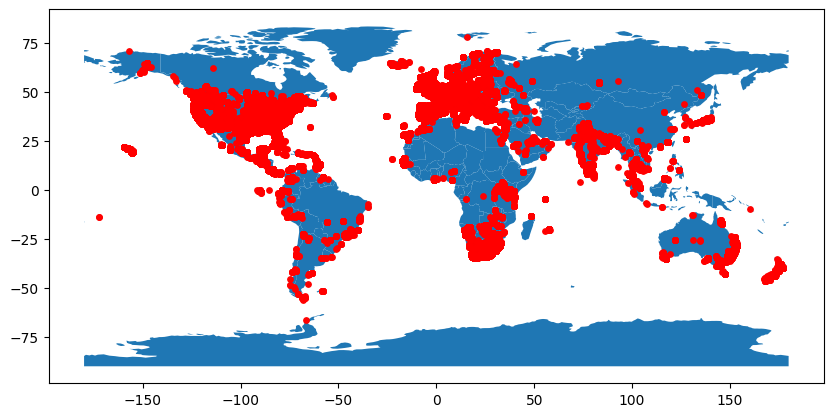

In [7]:
points = [Point(xy) for xy in zip(data["decimalLongitude"], data["decimalLatitude"])]
geo = gpd.GeoDataFrame(data, geometry=points)
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
geo.plot(ax=world.plot(figsize=(10, 6)), marker="o", color="red", markersize=15)

# Country Info

In [8]:
country = data.groupby('countryCode').size().sort_values(ascending=False)
country.head(10)

countryCode
GB    757805
US    101173
ZA     37354
NL     14088
DE     11215
IE      6113
ES      5621
MX      5111
AU      3501
CA      3105
dtype: int64

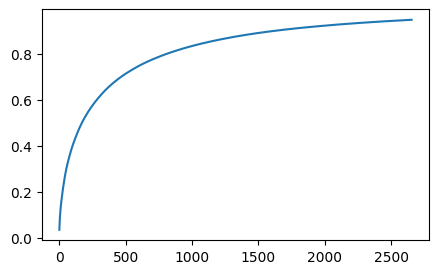

In [17]:
collectors = data.groupby('recordedBy').size().sort_values(ascending=False)
y = np.cumsum(collectors/collectors.sum())
y = y[y < 0.95]
plt.figure(figsize=(5, 3))
plt.plot(np.cumsum(np.ones_like(y.values)), y.values)

<Axes: xlabel='None', ylabel='None'>

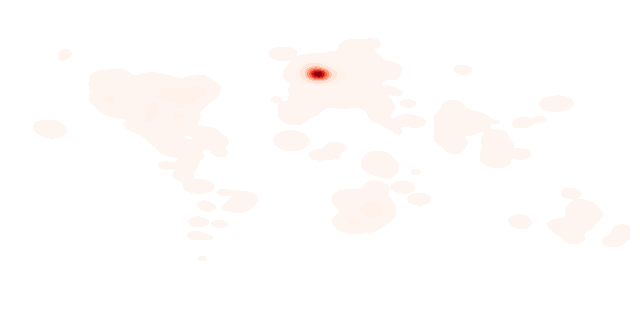

In [56]:
points = data[['decimalLatitude', 'decimalLongitude']].dropna()
points = [Point(xy) for xy in zip(points['decimalLongitude'], points['decimalLatitude'])]
# ax = gplt.polyplot(world, projection=gcrs.PlateCarree(), figsize=(10, 4), linewidth=0.3)
gplt.kdeplot(gpd.GeoDataFrame(geometry=points), fill=True, cmap="Reds", thresh=0.001)
# world.plot(ax=ax, color="white", edgecolor="black", alpha=0.3)
# gplt.polyplot(world, projection=gcrs.PlateCarree(), linewidth=0.3, ax=ax)